# Keras란?

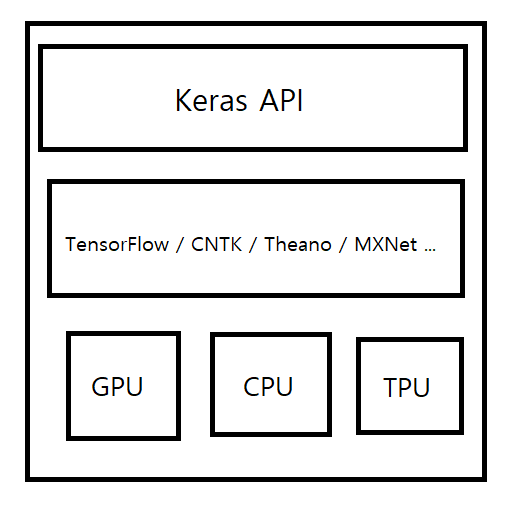

# Keras를 이용한 단순 선형회귀

In [ ]:
# y = wx+b = 2.3x+79.0
import numpy as np

# 텐서플로우, 케라스 함수 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 모델의 구조 설계
model = Sequential()
model.add(Dense(1, input_dim=1, activation='swish'))
model.compile(optimizer='sgd', loss='mse')
# optimizer : 오차를 어떻게 보정하여 최적화된 w와 b를 구할 것인가?
# loss : 손실함수

#오차를 최소화하는 과정을 2000번 반복
model.fit(x, y, epochs=1000)

In [ ]:
 # 모델 구조 요약 보기


In [ ]:
# 모델의 가중치와 편향 값을 출력해 보기


In [10]:
# x[2, 4, 6, 8]에 대한 예측된 성적은?


In [ ]:
# 3시간 공부했을 때 예측한 성적은?


# Keras를 이용한 다중 선형회귀

In [ ]:
# y = w1*x1 + w2*x2 + b = 1.51 * x1 + 2.29 * x2 + 77.72
import numpy as np

# 텐서플로우, 케라스 함수 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

x = np.array([[2,0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

# 모델의 구조 설계
model = Sequential()
model.add(Dense(?, input_dim=?, activation='swish'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=1000)

In [ ]:
# 모델의 가중치와 편향 값을 출력


In [ ]:
# 모델이 예측한 성적은


In [ ]:
# 3시간 공부하고 4시간 과외를 받는다면 몇점을 받을 수 있을까?


# 보스턴 집 값 데이터셋 살펴보기

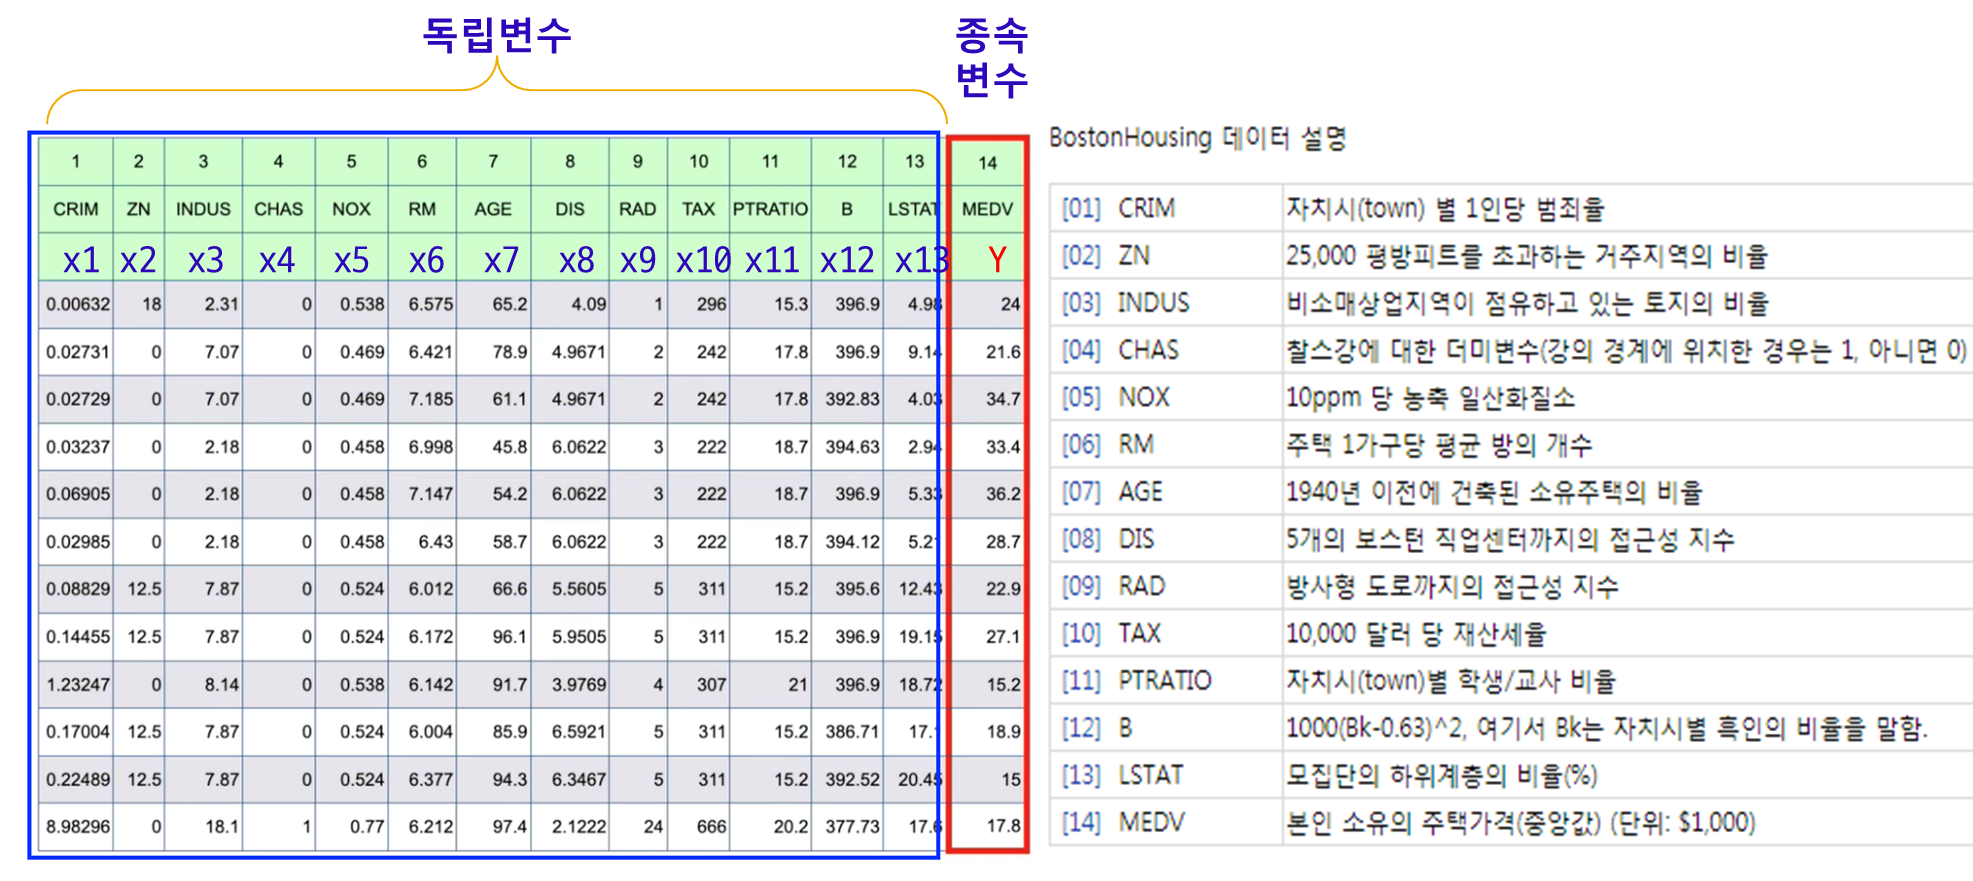

In [24]:
# pandas를 이용해 데이터 다루기
import pandas as pd

boston = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

In [28]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# 처음 5개 샘플 보기


In [ ]:
# 마지막 5개 샘플 보기


In [43]:
# 데이터셋 정보보기
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [29]:
# 모든 속성(변수)값 출력

boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

# 단일 레이어 모델 만들기

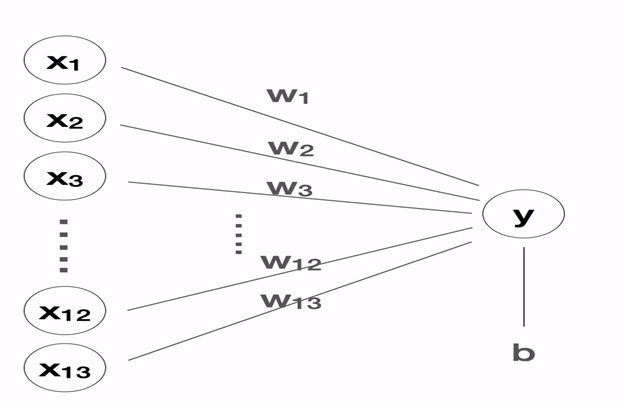

In [ ]:
# 케라스 모델 생성에 필요한 함수 가져오기
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 가져오기
boston = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

# 독립변수, 종속변수 분리
x = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = boston['medv']

# 모델 설계하기
???
???
???

# 모델 학습시키기
model.fit(x, y, epochs=20)

In [ ]:
# 모델 요약보기
model.summary()

# 문제 : total 파라미터 개수?  왜?

## 모델 활용하기

In [ ]:
# 각 가중치(w1 ~ w13)와 편향(b) 확인해 보기
model.get_weights()

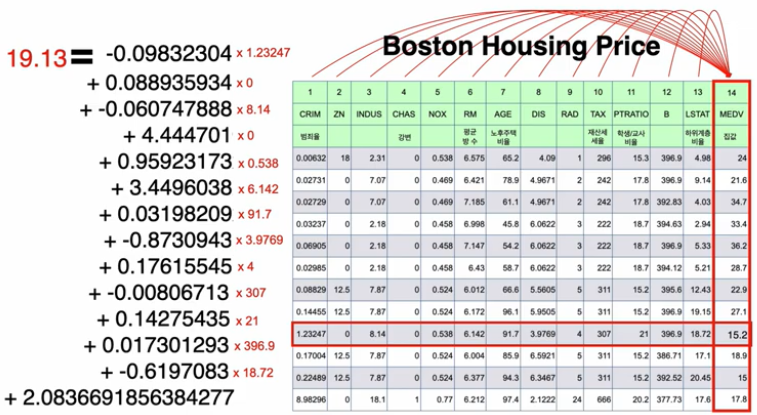

In [ ]:
# 독립변수의 0번 ~ 4번까지의 데이터로 집값 예측해 보기
model.predict(x[0:5])

In [ ]:
# 0번 ~ 4번까지 실제 가격 출력해 보기
y[0:5]

# 멀티 레이어 모델 만들기

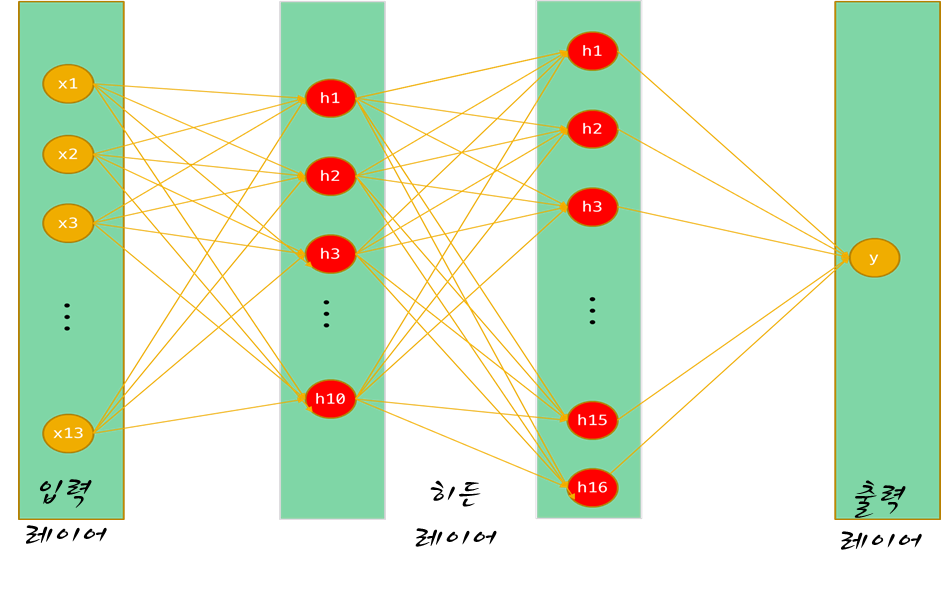

In [ ]:
# 케라스 모델 생성에 필요한 함수 가져오기
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 가져오기
boston = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

# 독립변수, 종속변수 분리
x = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = boston['medv']

# 모델 설계하기
???
???
???
???

# 모델 학습 시키기
model.fit(x, y, epochs=2000)

In [ ]:
# 모델 요약보기
model.summary()

# 문제 : total 파라미터 개수?  왜?

In [ ]:
# 각 가중치(w1 ~ w13)와 편향(b) 확인해 보기
model.get_weights()

In [ ]:
# 독립변수의 0번 ~ 4번까지의 데이터로 집값 예측해 보기
model.predict(x[0:5])

In [ ]:
y[0:5]